# Test/train splits

NablaDFT includes three datasets. Each of them are stored in full and shorten form. Also, each dataset splitted to train and test.

To navigate across all versions and datasets, we provide test and train index splits. That can be investigated and analyzed independently from the full datasets.

NablaDFT include five training datasets and six test datasets.

**Energy database** includes the following splits.

**Train subsets:** dataset_train_2k, dataset_train_5k, dataset_train_10k, dataset_train_100k, dataset_train_full

**Test subsets:** dataset_test_conformations_2k, dataset_test_conformations_5k, dataset_test_conformations_10k, dataset_test_conformations_100k, dataset_test_structures, dataset_test_scaffolds

**Hamiltonian database** include splits with the same names, but splits include diffrent molecule. Please, note that, all databases of nablaDFT independent from each other and was prepared independently. However, we can use unique pair of indexes (`moses_id`, `conformation_id`) to determine a molecule and its conformation across all nablaDFT. 

The following code calculates number of molecules and number of conformations in the smallest split of Hamiltonian database.

In [43]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [44]:
folder = "/home/kostanew/2024/moped-private-2024/notebooks/apr_download_wfn/splits/"
dataset_train_2k = np.load(folder+'dataset_train_2k.npz')

In [45]:
print(f"Number of molecules: {len(np.unique(dataset_train_2k['moses_ids']))}")
print(f"Number of conformations: {len(dataset_train_2k['conformation_ids'])}")

Number of molecules: 2809
Number of conformations: 12145


The following code calculates a number of conformations per each molecule in `dataset_train_2k` split

In [46]:
dict_id_conf = {}

for id_, conf_id_ in zip(dataset_train_2k['moses_ids'], dataset_train_2k['conformation_ids']):
    if id_ not in dict_id_conf:
        dict_id_conf[id_] = 0
    dict_id_conf[id_] += 1

In [47]:
num_of_conf = [ci for i, ci in dict_id_conf.items()]

dict_conf_size = {}

for id_ in num_of_conf:
    if id_ not in dict_conf_size:
        dict_conf_size[id_] = 0
    dict_conf_size[id_] += 1

dict_conf_size = np.array(list(dict_conf_size.items()))

Text(0.5, 0, 'Number of conformations per molecule')

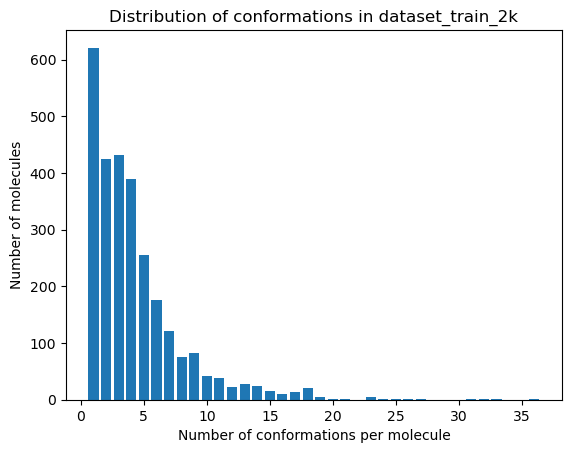

In [49]:
plt.bar(dict_conf_size[:,0], dict_conf_size[:,1])
plt.title("Distribution of conformations in dataset_train_2k")
plt.ylabel('Number of molecules')
plt.xlabel('Number of conformations per molecule')